In [1]:
# step1_data_collection.py
import pandas as pd

# Path to your Excel file
DATA_PATH = r"C:\xml\1730284951-Global Terrorism Index 2023 (1) (1).xlsx"

# Read the sheet that contains combined data
df = pd.read_excel(DATA_PATH, sheet_name="Combined raw")

print("✅ Data successfully loaded!")
print("Shape:", df.shape)
print("\nColumns available:")
print(df.columns.tolist())

print("\nPreview of data:")
print(df.head())


✅ Data successfully loaded!
Shape: (1793, 9)

Columns available:
['iso3c', 'Country', 'Rank', 'Score', 'Incidents', 'Fatalities', 'Injuries', 'Hostages', 'Year']

Preview of data:
  iso3c      Country  Rank     Score  Incidents  Fatalities  Injuries  \
0   IRQ         Iraq     1  9.599967       1288        2086      5050   
1   PAK     Pakistan     2  9.152620        638        1322      2297   
2   AFG  Afghanistan     3  9.134265        507        1511      2612   
3   SYR        Syria     4  8.238079        168        1014      1833   
4   YEM        Yemen     5  8.098513        219         651       798   

   Hostages  Year  
0        16  2012  
1       160  2012  
2        67  2012  
3        71  2012  
4       121  2012  


In [2]:
# step2_data_preprocessing.py
import pandas as pd

DATA_PATH = r"C:\xml\1730284951-Global Terrorism Index 2023 (1) (1).xlsx"

# Load sheet
df = pd.read_excel(DATA_PATH, sheet_name="Combined raw")

# Select relevant columns
data = df[['Country', 'Year', 'Incidents', 'Fatalities', 'Injuries', 'Hostages', 'Score', 'Rank']].copy()

# Handle missing numeric data
for col in ['Incidents', 'Fatalities', 'Injuries', 'Hostages', 'Score', 'Rank']:
    data[col] = data[col].fillna(0)

# Drop rows missing Country/Year
data.dropna(subset=['Country', 'Year'], inplace=True)

# Convert datatypes
data['Year'] = data['Year'].astype(int)

print("✅ Data cleaned successfully!")
print(data.info())
print(data.head())

# Save for next steps
data.to_csv(r"C:\xml\gti_cleaned.csv", index=False)
print("\nCleaned file saved as gti_cleaned.csv")


✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     1793 non-null   object 
 1   Year        1793 non-null   int64  
 2   Incidents   1793 non-null   int64  
 3   Fatalities  1793 non-null   int64  
 4   Injuries    1793 non-null   int64  
 5   Hostages    1793 non-null   int64  
 6   Score       1793 non-null   float64
 7   Rank        1793 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 112.2+ KB
None
       Country  Year  Incidents  Fatalities  Injuries  Hostages     Score  \
0         Iraq  2012       1288        2086      5050        16  9.599967   
1     Pakistan  2012        638        1322      2297       160  9.152620   
2  Afghanistan  2012        507        1511      2612        67  9.134265   
3        Syria  2012        168        1014      1833        71  8.238079   
4

In [3]:
# step3_model_development.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load cleaned data
data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

# Features and target
X = data[['Incidents', 'Fatalities', 'Injuries', 'Hostages', 'Rank']]
y = data['Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model trained successfully!")
print("Mean Absolute Error:", round(mae, 3))
print("R² Score:", round(r2, 3))


✅ Model trained successfully!
Mean Absolute Error: 0.166
R² Score: 0.99


C:\Users\vsrau\AppData\Local\Temp\ipykernel_10540\878731321.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Year", y="Incidents", data=data, ci=None)


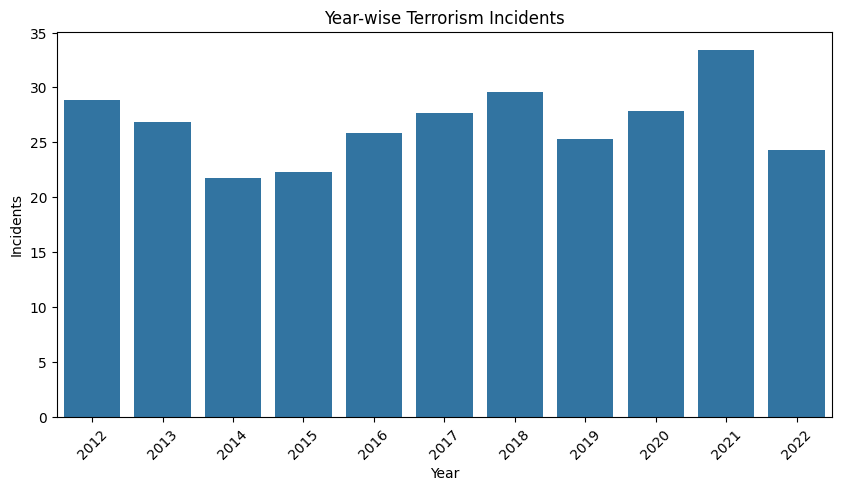

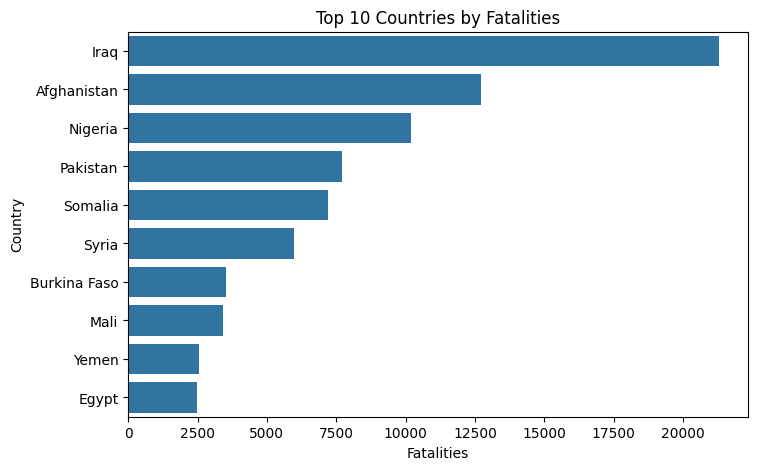

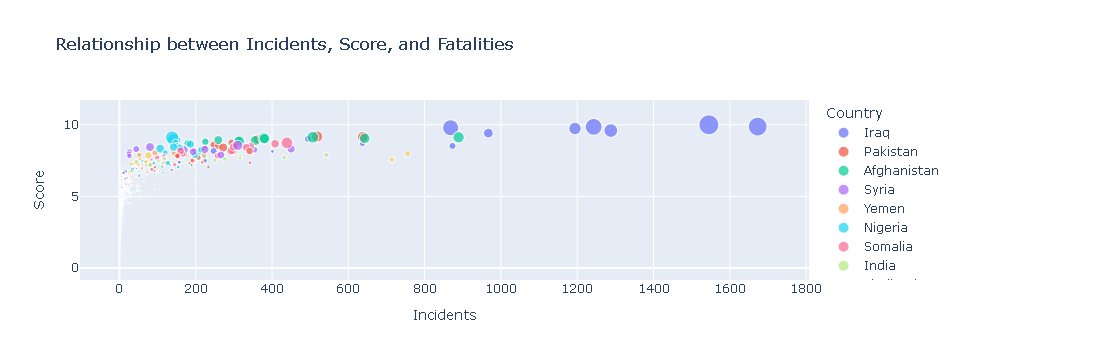

In [4]:
# step4_visualization.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

# --- 1. Year-wise Incidents ---
plt.figure(figsize=(10,5))
sns.barplot(x="Year", y="Incidents", data=data, ci=None)
plt.title("Year-wise Terrorism Incidents")
plt.xticks(rotation=45)
plt.show()

# --- 2. Country-wise Fatalities (Top 10) ---
top10 = data.groupby("Country")["Fatalities"].sum().nlargest(10).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(y="Country", x="Fatalities", data=top10)
plt.title("Top 10 Countries by Fatalities")
plt.show()

# --- 3. Interactive Plotly Visualization ---
fig = px.scatter(
    data,
    x="Incidents",
    y="Score",
    size="Fatalities",
    color="Country",
    hover_name="Country",
    title="Relationship between Incidents, Score, and Fatalities"
)
fig.show()


In [5]:
# step4_visualization_advanced.py

# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# --- Load cleaned dataset ---
data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

print("✅ Data Loaded Successfully!")
print(data.head())


✅ Data Loaded Successfully!
       Country  Year  Incidents  Fatalities  Injuries  Hostages     Score  \
0         Iraq  2012       1288        2086      5050        16  9.599967   
1     Pakistan  2012        638        1322      2297       160  9.152620   
2  Afghanistan  2012        507        1511      2612        67  9.134265   
3        Syria  2012        168        1014      1833        71  8.238079   
4        Yemen  2012        219         651       798       121  8.098513   

   Rank  
0     1  
1     2  
2     3  
3     4  
4     5  


C:\Users\vsrau\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



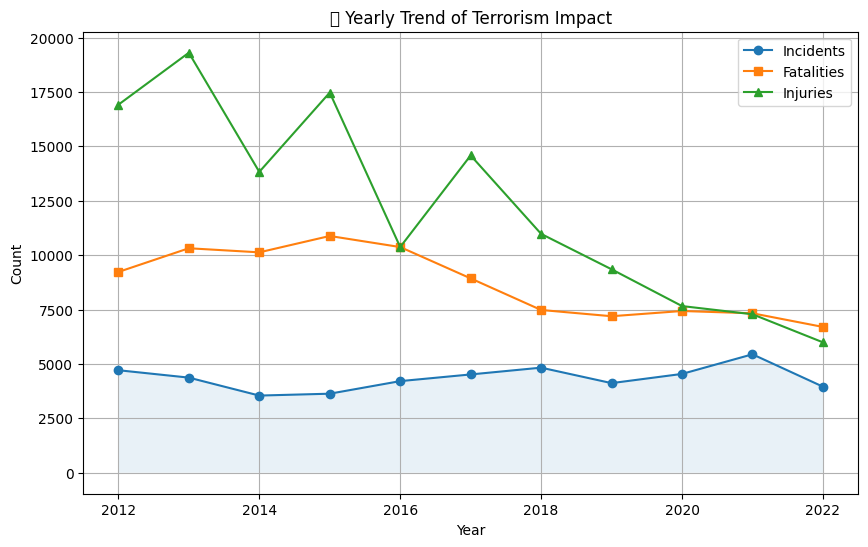

In [6]:
# --- Yearly Trend of Incidents, Fatalities, and Injuries ---
yearly_data = data.groupby("Year")[["Incidents", "Fatalities", "Injuries"]].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(yearly_data["Year"], yearly_data["Incidents"], label="Incidents", marker="o")
plt.plot(yearly_data["Year"], yearly_data["Fatalities"], label="Fatalities", marker="s")
plt.plot(yearly_data["Year"], yearly_data["Injuries"], label="Injuries", marker="^")
plt.fill_between(yearly_data["Year"], yearly_data["Incidents"], alpha=0.1)
plt.title("📈 Yearly Trend of Terrorism Impact")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\vsrau\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



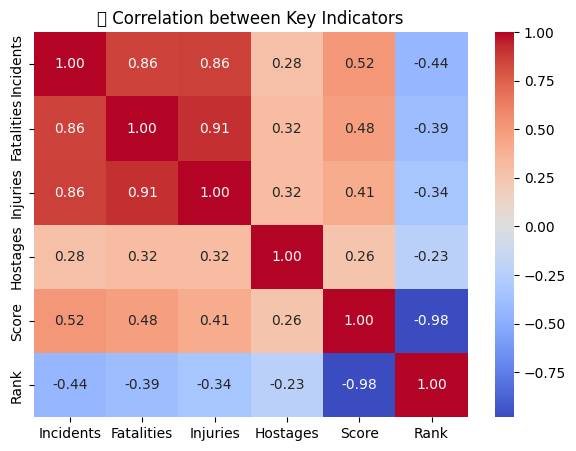

In [7]:
# --- Correlation between numeric variables ---
plt.figure(figsize=(7,5))
corr = data[["Incidents", "Fatalities", "Injuries", "Hostages", "Score", "Rank"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Correlation between Key Indicators")
plt.show()


C:\Users\vsrau\AppData\Local\Temp\ipykernel_10540\971163597.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\vsrau\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.



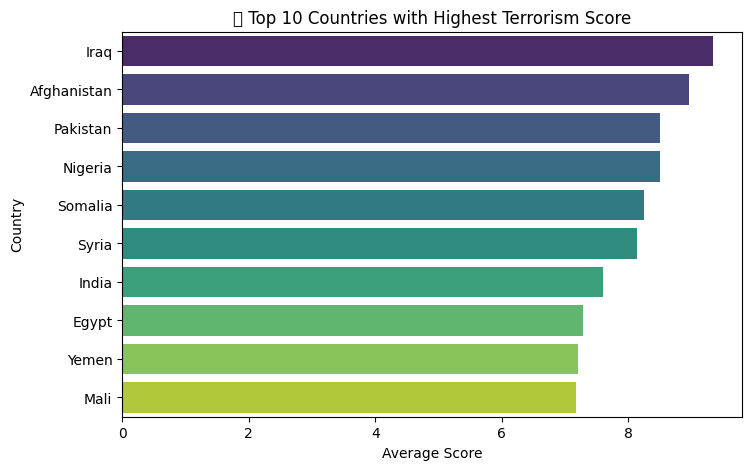

In [8]:
# --- Top 10 countries by average score ---
top10_score = data.groupby("Country")["Score"].mean().nlargest(10).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=top10_score, x="Score", y="Country", palette="viridis")
plt.title("🌍 Top 10 Countries with Highest Terrorism Score")
plt.xlabel("Average Score")
plt.ylabel("Country")
plt.show()


C:\Users\vsrau\AppData\Local\Temp\ipykernel_10540\2633863714.py:7: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



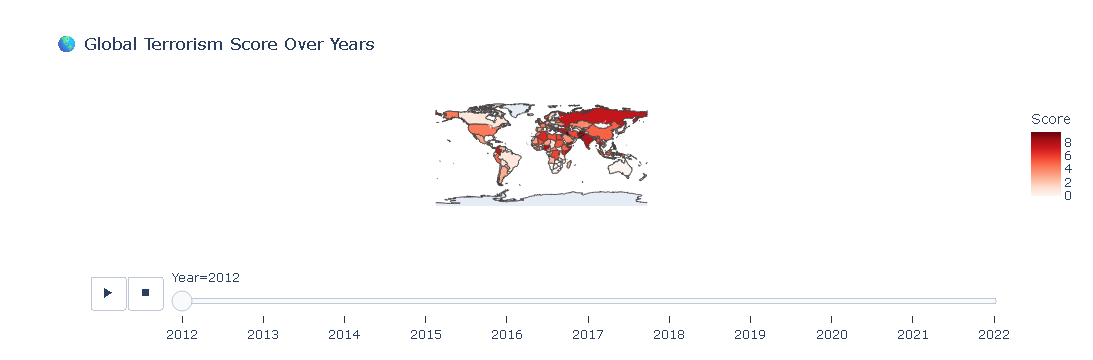

In [10]:
# --- Interactive World Map (fixed) ---
import plotly.express as px
import pandas as pd

data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

fig = px.choropleth(
    data,
    locations="Country",             # ✅ use country names directly
    locationmode="country names",    # ✅ tell plotly to interpret names
    color="Score",
    hover_name="Country",
    animation_frame="Year",
    color_continuous_scale="Reds",
    title="🌎 Global Terrorism Score Over Years"
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


In [13]:
!pip install pycountry


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.3 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.3 MB 646.0 kB/s eta 0:00:09
   --- ------------------------------------ 0.5/6.3 MB 646.0 kB/s eta 0:00:09
   ---- ----------------------------------- 0.8/6.3 MB 610.2 kB/s eta 0:00:10
   ---- ----------------------------------- 0.8/6.3 MB 610.2 kB/s eta 0:00:10
   ------ --------------------------------- 1.0/6.3 MB 640.7 kB/s eta 0:00:09
   -------- ------------------------------- 1.3/6.3 MB 749.6 kB/s eta 0:00:07
   --------- ------------------------------ 1.6/6.3 MB 828.0 kB/s eta 0:00:06
   ----------- ---------------------------- 1.8/6.3 MB 873.0 kB/s eta 0:00:06
   ------------- -----

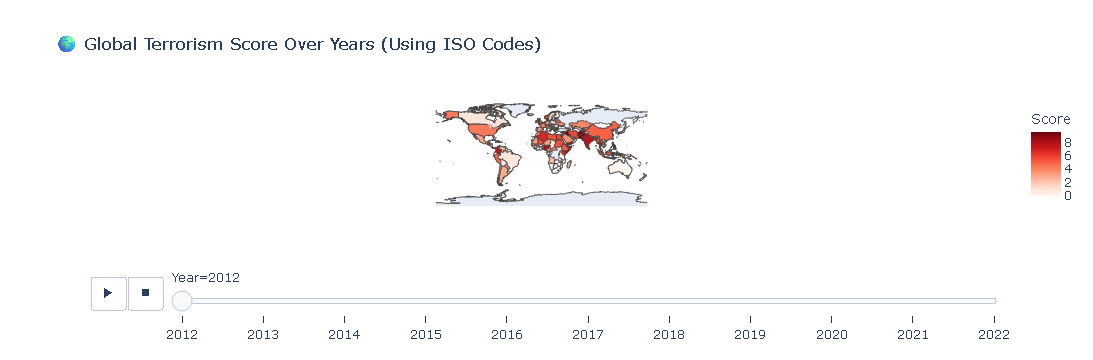

In [3]:
import pycountry
import pandas as pd
import plotly.express as px

data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

def get_iso3(country):
    try:
        return pycountry.countries.lookup(country).alpha_3
    except:
        return None

data['iso3c'] = data['Country'].apply(get_iso3)
data.dropna(subset=['iso3c'], inplace=True)

fig = px.choropleth(
    data,
    locations="iso3c",
    color="Score",
    hover_name="Country",
    animation_frame="Year",
    color_continuous_scale="Reds",
    title="🌍 Global Terrorism Score Over Years (Using ISO Codes)"
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


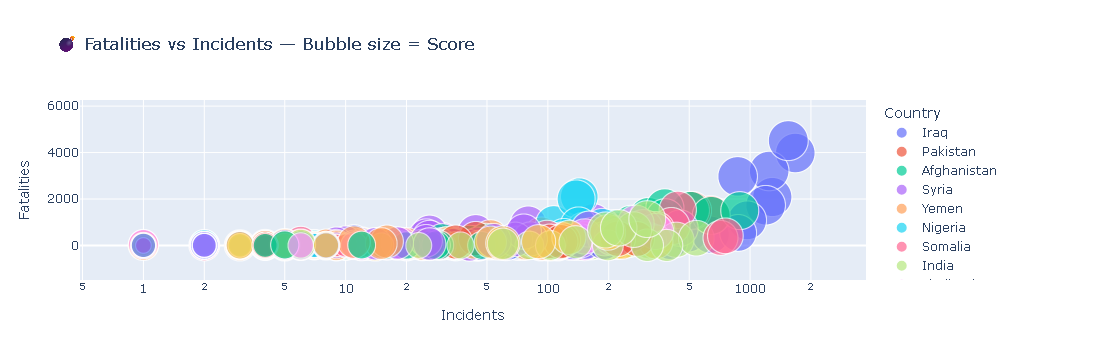

In [4]:
# --- Bubble chart for overall relationship ---
fig2 = px.scatter(
    data,
    x="Incidents",
    y="Fatalities",
    size="Score",
    color="Country",
    hover_name="Country",
    title="💣 Fatalities vs Incidents — Bubble size = Score",
    log_x=True,
    size_max=40
)
fig2.show()


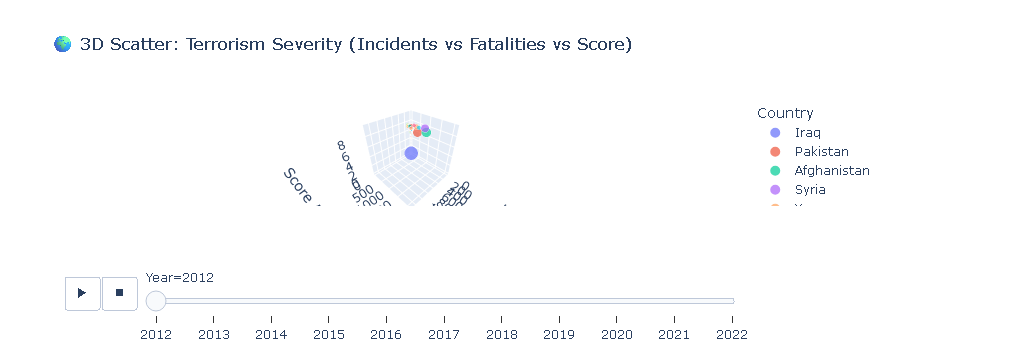

In [6]:
# step4_3d_visualization_1.py
import pandas as pd
import plotly.express as px

data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

fig = px.scatter_3d(
    data,
    x='Incidents',
    y='Fatalities',
    z='Score',
    color='Country',
    size='Injuries',
    hover_name='Country',
    animation_frame='Year',
    title='🌍 3D Scatter: Terrorism Severity (Incidents vs Fatalities vs Score)',
    size_max=30
)

fig.update_layout(scene=dict(
    xaxis_title='Incidents',
    yaxis_title='Fatalities',
    zaxis_title='Score'
))
fig.show()


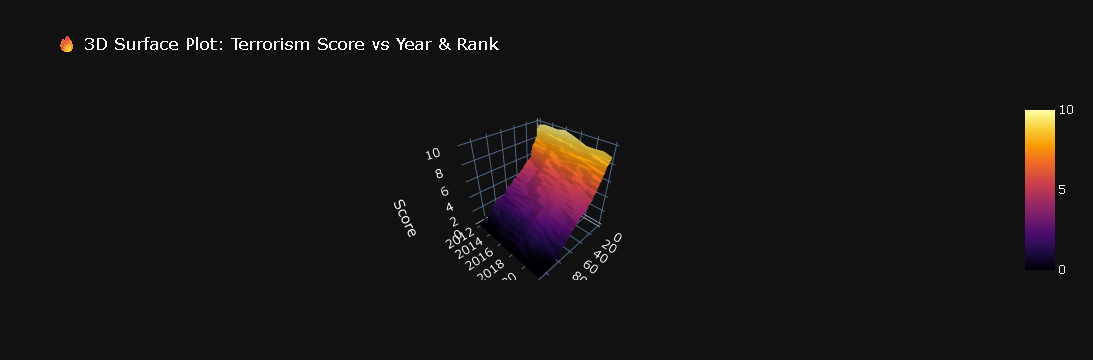

In [7]:
# step4_3d_visualization_2.py
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

# Pivot data for 3D surface (Year vs Rank)
pivot = data.pivot_table(values='Score', index='Year', columns='Rank', aggfunc='mean').fillna(0)

fig = go.Figure(data=[go.Surface(
    z=pivot.values,
    x=pivot.columns,
    y=pivot.index,
    colorscale='Inferno'
)])
fig.update_layout(
    title='🔥 3D Surface Plot: Terrorism Score vs Year & Rank',
    scene=dict(
        xaxis_title='Rank',
        yaxis_title='Year',
        zaxis_title='Score'
    ),
    autosize=True,
    template='plotly_dark'
)
fig.show()


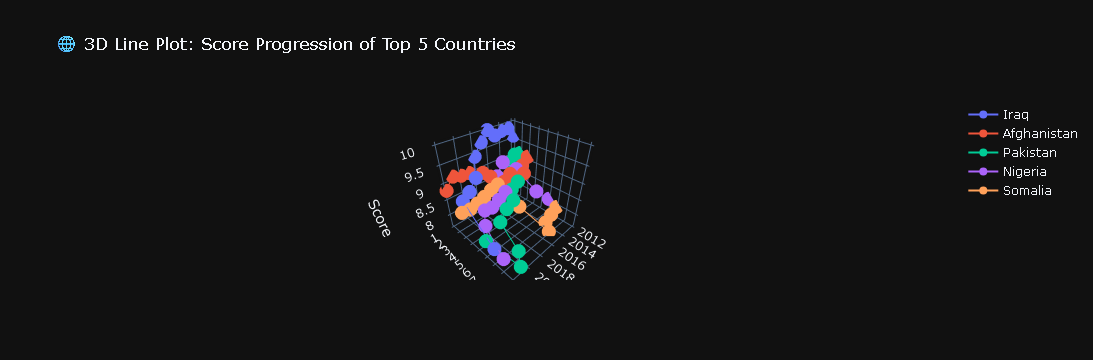

In [8]:
# step4_3d_visualization_4.py
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv(r"C:\xml\gti_cleaned.csv")

# Get top 5 countries with highest average score
top5 = data.groupby('Country')['Score'].mean().nlargest(5).index
top_data = data[data['Country'].isin(top5)]

fig = go.Figure()

for c in top5:
    df_c = top_data[top_data['Country'] == c]
    fig.add_trace(go.Scatter3d(
        x=df_c['Year'],
        y=df_c['Rank'],
        z=df_c['Score'],
        mode='lines+markers',
        name=c
    ))

fig.update_layout(
    title='🌐 3D Line Plot: Score Progression of Top 5 Countries',
    scene=dict(
        xaxis_title='Year',
        yaxis_title='Rank',
        zaxis_title='Score'
    ),
    template='plotly_dark'
)
fig.show()
